<a href="https://colab.research.google.com/github/JumanaRahim/TSA/blob/main/Assi.1/ACFandPACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

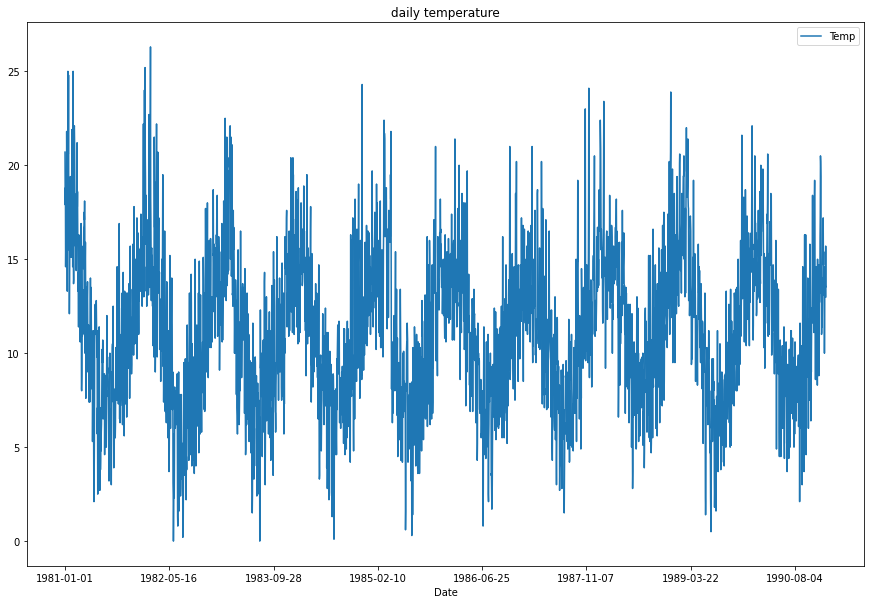

In [ ]:
import pandas as pd
series=pd.read_csv("/content/daily-min-temperatures.csv",index_col='Date')
series
from matplotlib import pyplot
series.plot(figsize=(15,10))
pyplot.title("daily temperature")
pyplot.show()

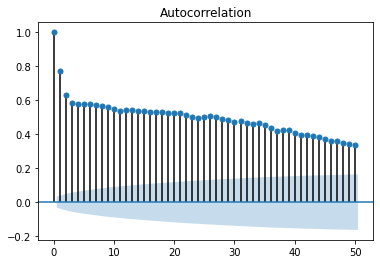

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=50)
pyplot.show()

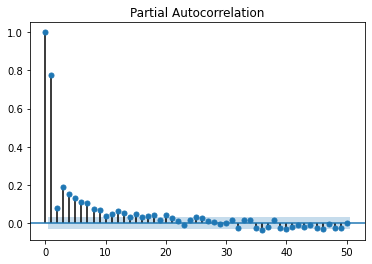

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=50)
pyplot.show()

In [ ]:
series2=pd.read_csv("/content/daily-total-female-births.csv",index_col='Date')
series2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


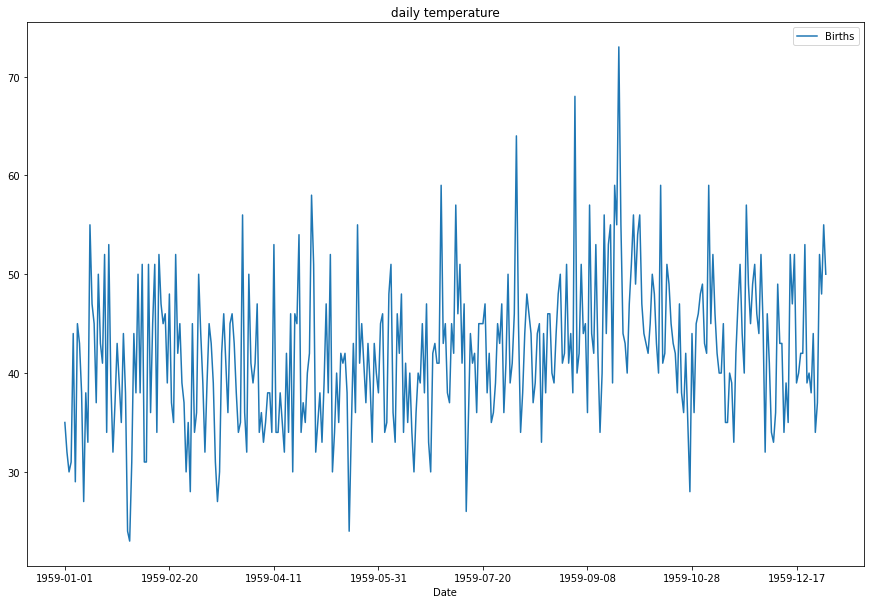

In [ ]:
from matplotlib import pyplot
series2.plot(figsize=(15,10))
pyplot.title("female birth")
pyplot.show()

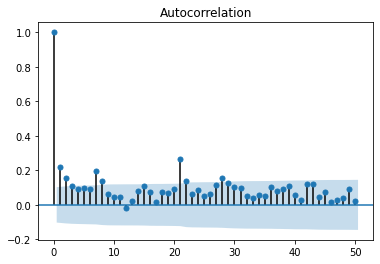

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series2,lags=50)
pyplot.show()

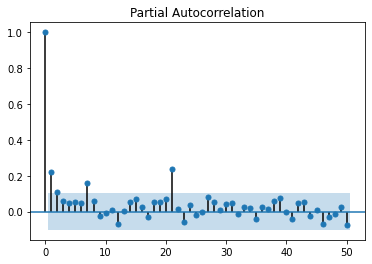

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series2,lags=50)
pyplot.show()

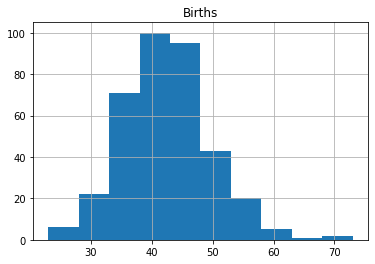

In [ ]:
series2.hist()
pyplot.show()

In [ ]:
x=series2.values
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print(mean1,mean2)

39.76373626373626 44.185792349726775


In [ ]:
print(var1,var2)

49.21341021615746 48.708650601690096


In [ ]:
series3=pd.read_csv("/content/airline-passengers.csv",index_col='Month')
series3

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


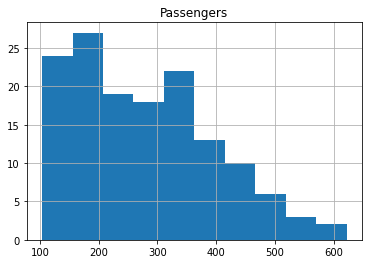

In [ ]:
series3.hist()
pyplot.show()

In [ ]:
x=series3.values
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print(mean1,mean2)

182.90277777777777 377.69444444444446


In [ ]:
print(var1,var2)

2244.0877700617284 7367.962191358024


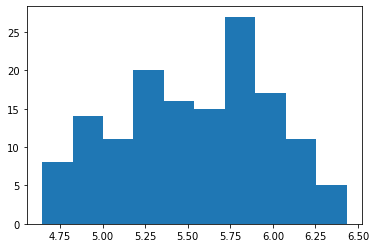

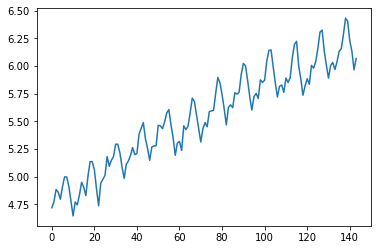

In [ ]:
from numpy import log
x=series3.values
x=log(x)
pyplot.hist(x)
pyplot.show()
pyplot.plot(x)
pyplot.show()

In [ ]:
x=series3.values
x=log(x)
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print(mean1,mean2)

5.17514614000377 5.909205777059973


In [ ]:
print(var1,var2)

0.06837486074542806 0.04926419375638024


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
series2=pd.read_csv("/content/daily-total-female-births.csv",index_col='Date',squeeze=True)
series2
x=series2.values
result=adfuller(x)
print(result)

(-4.808291253559765, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)


In [ ]:
series3=pd.read_csv("/content/airline-passengers.csv",index_col='Month',squeeze=True)
series3
x=series3.values
result=adfuller(x)
print(result)

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [ ]:
from logging import critical
print('ADF Static: %f' %result[0])
print('p-value: %f' %result[1])

ADF Static: -4.808291
p-value: 0.000052


In [3]:
import pandas as pd
series3_new=pd.read_csv('/content/AirPassengers..csv')
series3_new

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
series3_new['diff_1'] = series3_new['#Passengers'].diff().fillna(0)
series3_new['diff_2']= series3_new['#Passengers'].diff(periods=2).fillna(0)
series3_new

,Month,#Passengers,diff_1,diff_2
0,1949-01,112,0.0,0.0
1,1949-02,118,6.0,0.0
2,1949-03,132,14.0,20.0
3,1949-04,129,-3.0,11.0
4,1949-05,121,-8.0,-11.0
...,...,...,...,...
139,1960-08,606,-16.0,71.0
140,1960-09,508,-98.0,-114.0
141,1960-10,461,-47.0,-145.0
142,1960-11,390,-71.0,-118.0


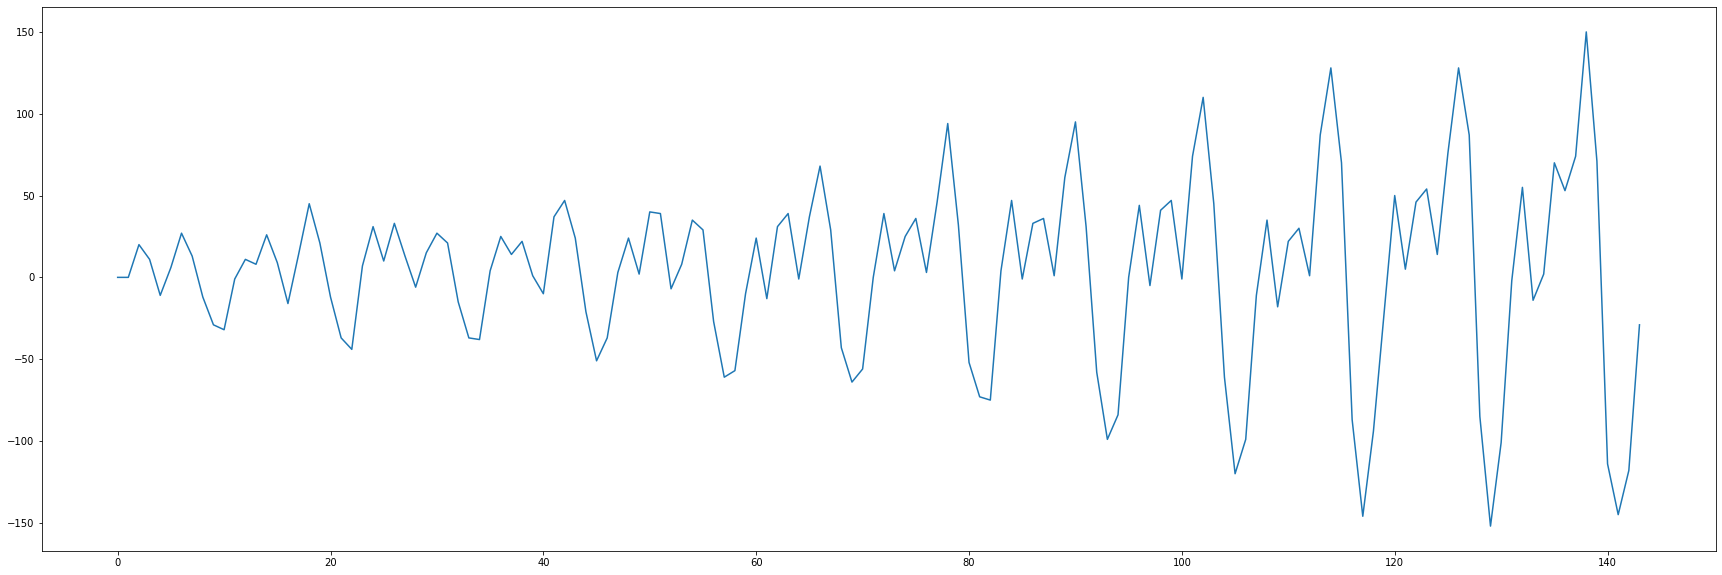

In [9]:
series3_new["diff_2"].plot(figsize=(30,10))

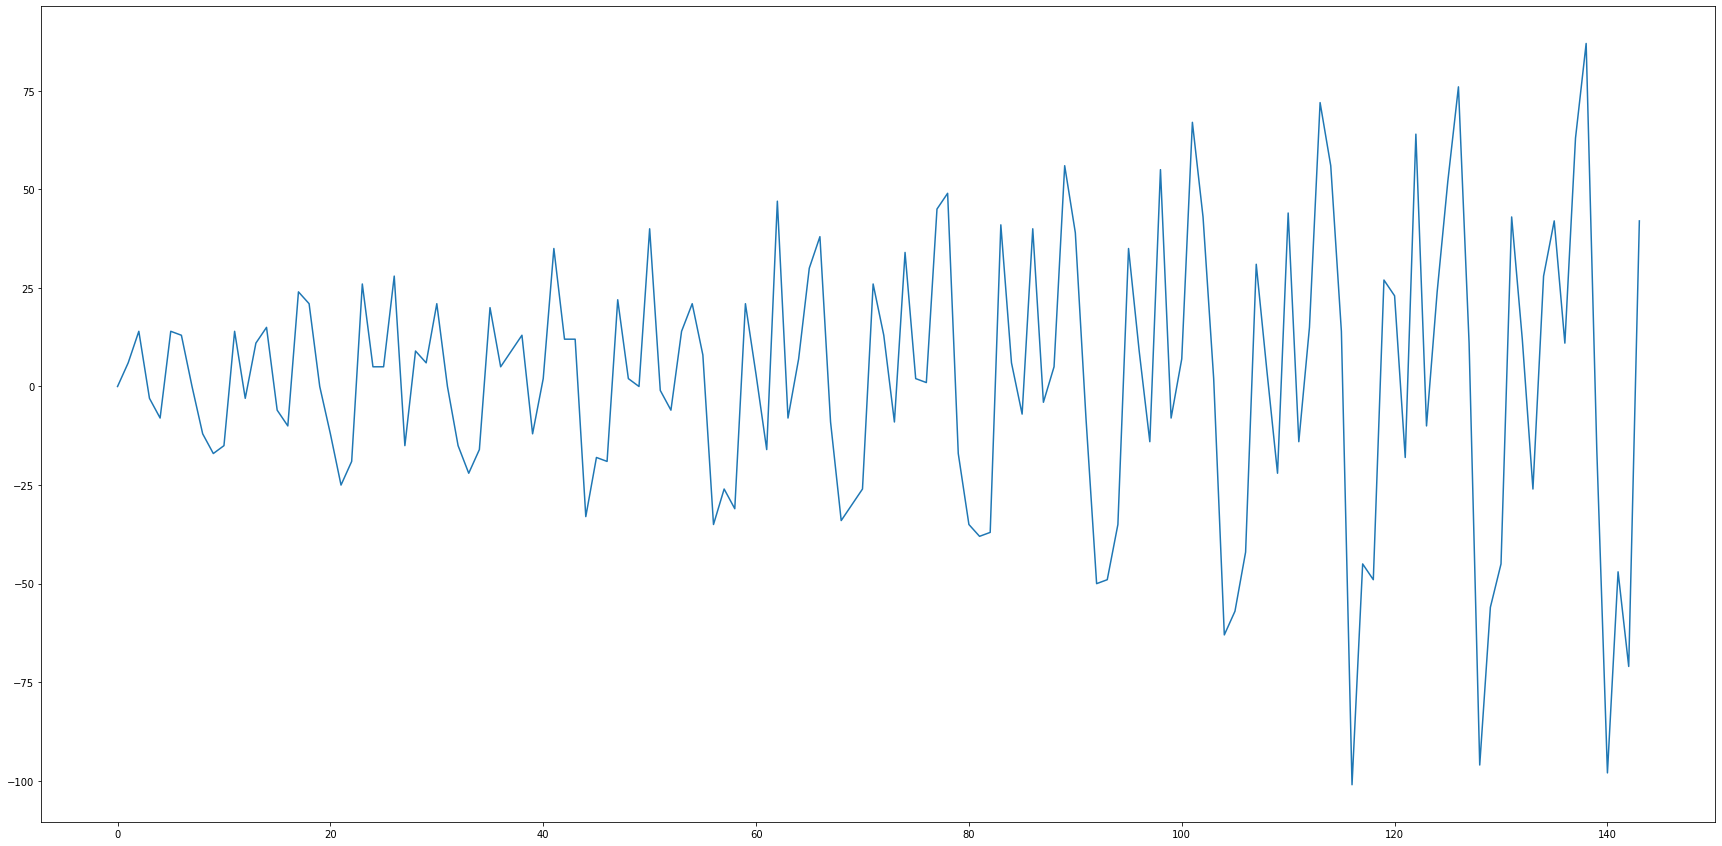

In [10]:
series3_new["diff_1"].plot(figsize=(30,15))

In [11]:
from statsmodels.tsa.stattools import adfuller
x=series3_new['diff_1'].values
res=adfuller(x)
res

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-2.8891860694712546,
 0.046620039206754685,
 12,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.883867891664528},
 995.4013901509479)

In [28]:
series4=pd.read_csv('/content/PFE_US_Equity...csv',index_col="Date")
series4=series4.dropna()
series4

,PX_LAST,PX_VOLUME
Date,,
05-01-2015,32.3061,21543362
05-04-2015,32.5336,23590434
05-05-2015,32.3440,22382158
05-06-2015,31.7184,26859481
05-07-2015,31.8321,21508469
...,...,...
05-10-2021,39.8600,30831871
05-11-2021,39.3500,30568572
05-12-2021,39.6900,26208608


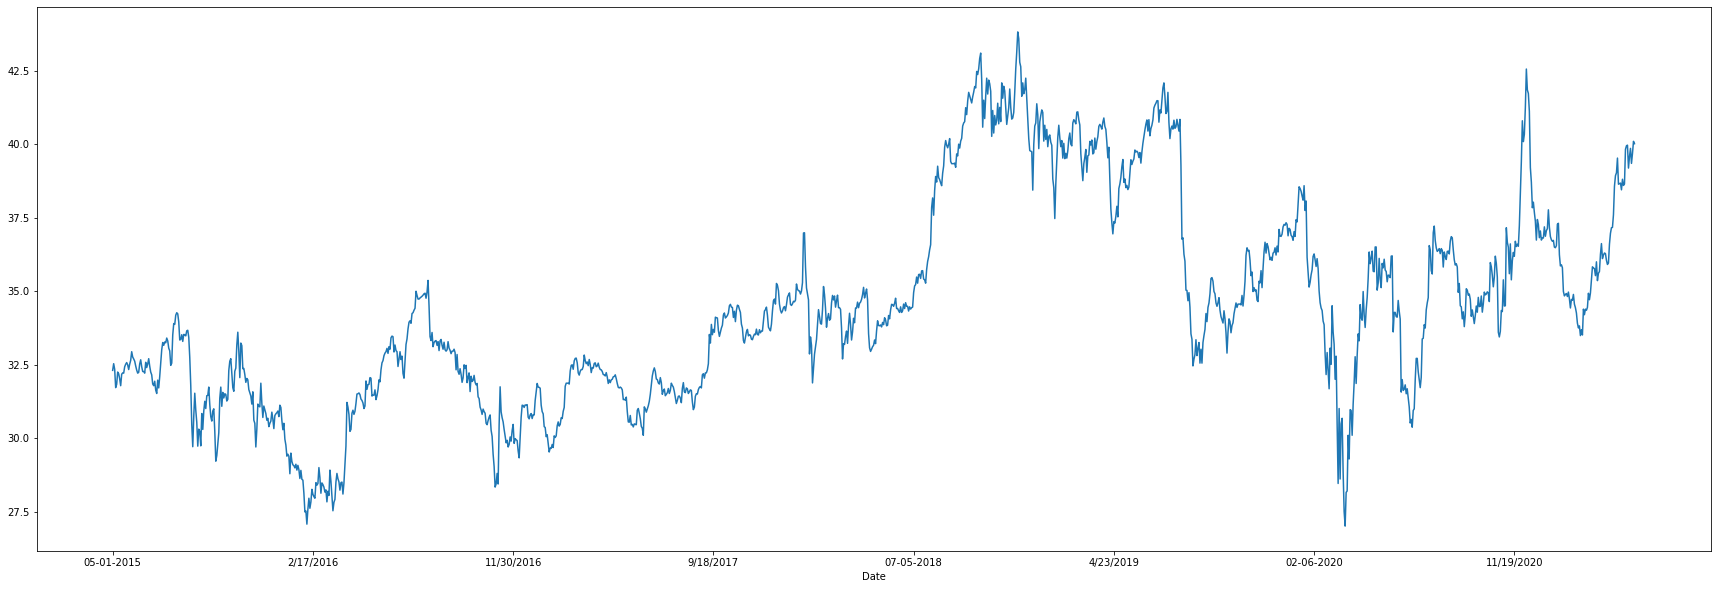

In [29]:
series4["PX_LAST"].plot(figsize=(30,10))
pyplot.show()

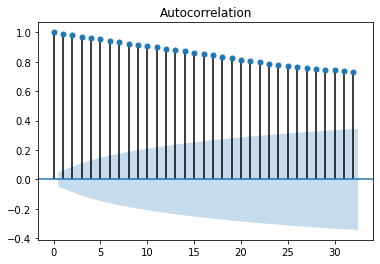

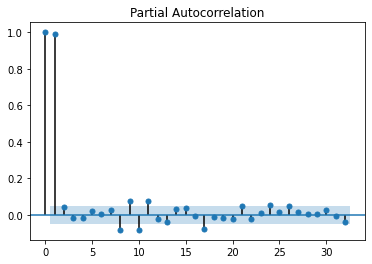

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series4["PX_LAST"])
pyplot.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series4["PX_LAST"])
pyplot.show()

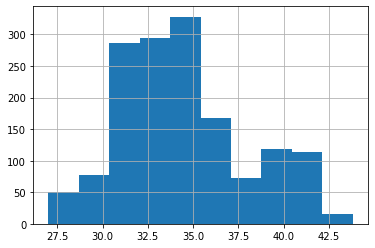

In [39]:
series4=series4["PX_LAST"]
series4.hist()

In [41]:
X=series4.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

32.04194710526316 36.887129434954005
3.144702281228463 9.367976141183519


In [42]:
cols=['Date','PX_LAST']
series4=pd.read_csv('/content/PFE_US_Equity...csv',usecols=cols,index_col='Date',squeeze=True).dropna()
X=series4.values
res=adfuller(X)
res

(-2.4702183180834103,
 0.1228896857907556,
 16,
 1504,
 {'1%': -3.4347053829922043,
  '10%': -2.5677941141530387,
  '5%': -2.863463625572207},
 2007.6439363715044)

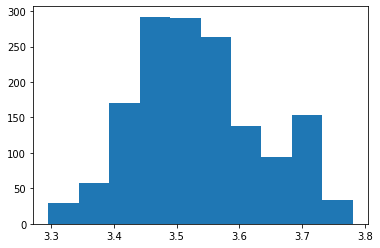

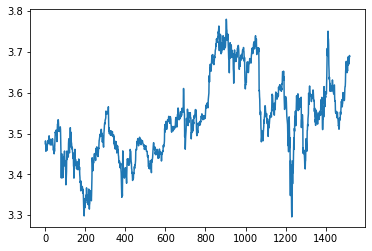

In [44]:
from numpy import log
X=series4.values
X=log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [45]:
X=series4.values
X=log(X)
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

3.4654908778144664 3.6043781758844102
0.003135811212063039 0.007021013271008528


In [46]:
cols=['Date','PX_LAST']
series4=pd.read_csv('/content/PFE_US_Equity...csv',usecols=cols,index_col='Date',squeeze=True).dropna()
X=series4.values
X=log(X)
result=adfuller(X)
result

(-2.495441376982762,
 0.11658743059799376,
 16,
 1504,
 {'1%': -3.4347053829922043,
  '10%': -2.5677941141530387,
  '5%': -2.863463625572207},
 -8556.372852834336)

In [51]:
from numpy import sqrt
series4=sqrt(series4)
series4

Date
05-01-2015    5.683846
05-04-2015    5.703823
05-05-2015    5.687179
05-06-2015    5.631909
05-07-2015    5.641994
                ...   
05-10-2021    6.313478
05-11-2021    6.272958
05-12-2021    6.300000
5/13/2021     6.332456
5/14/2021     6.326136
Name: PX_LAST, Length: 1521, dtype: float64

In [53]:
series4=sqrt(series4)
X=series4.values
result=adfuller(X)
result

(-2.4883942009927105,
 0.11832373830964477,
 16,
 1504,
 {'1%': -3.4347053829922043,
  '10%': -2.5677941141530387,
  '5%': -2.863463625572207},
 -10069.621247604593)

In [55]:
cols=['Date','PX_LAST']
series4=pd.read_csv('/content/PFE_US_Equity...csv',usecols=cols,index_col='Date')
series4['diff_1'] = series4['PX_LAST'].diff().fillna(0)
series4['diff_2'] = series4['PX_LAST'].diff(periods=2).fillna(0)
series4=series4.dropna()

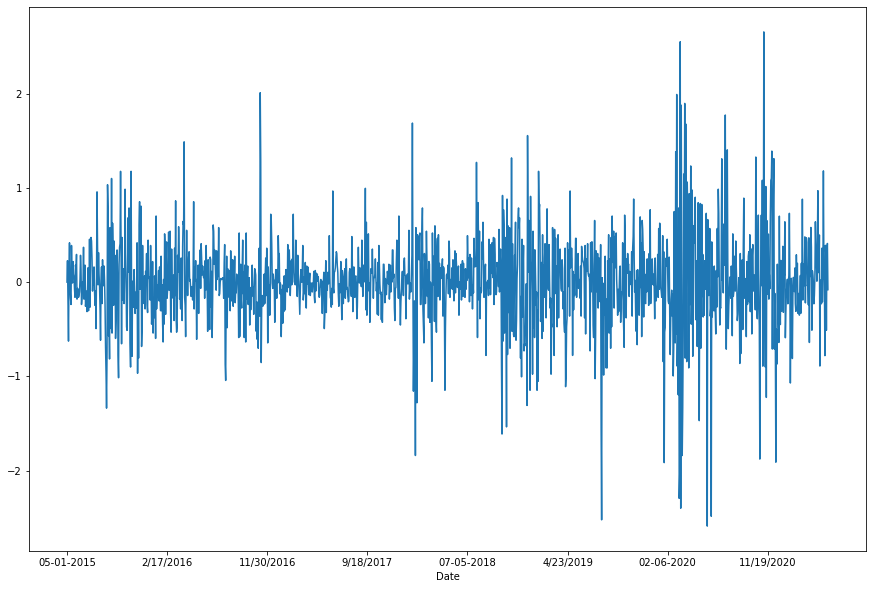

In [63]:
series4["diff_1"].plot(figsize=(15,10))

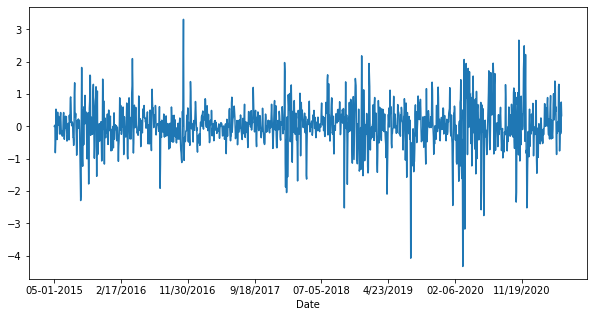

In [61]:
series4["diff_2"].plot(figsize=(10,5))

In [64]:
x=series4['diff_2'].values
res=adfuller(x)
res

(-8.686990404712194,
 4.137666363789291e-14,
 23,
 1497,
 {'1%': -3.434725783926551,
  '10%': -2.567798908763865,
  '5%': -2.863472629385615},
 2073.535268654949)

In [65]:
x=series4['diff_1'].values
res=adfuller(x)
res

(-9.365337611433688,
 7.627197522163184e-16,
 15,
 1505,
 {'1%': -3.434702484091523,
  '10%': -2.567793432853942,
  '5%': -2.8634623461571733},
 2011.7992991480824)